## Create Edge List
Creates an edge list for each patch in a provided patch raster and cost surface

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import networkx as nx
import os

In [2]:
%run ./DU_GraphTools99.py

In [3]:
def msg(txt):
    print(txt)
    if "arcpy" in dir(): arcpy.AddMessage(txt)
    return

In [4]:
def buildGraph(edgeFile,maxThresh):
    if not os.path.exists(edgeFile):
        print("{} does not exist".format(edgeFile))
    # Build graph from edgelist
    G = nx.Graph()
    edgeList = open(edgeFile, 'r')
    lineText = edgeList.readline()
    # Check whether the first line is a header line
    if (lineText.split(",")[0]).isalpha:
        lineText = edgeList.readline()
    while lineText:
        lineData = lineText.split(",")
        u = int(lineData[0])
        v = int(lineData[1])
        w = float(lineData[2][:-1])
        if w <= maxThresh:
            G.add_edge(u,v,weight = w)
        lineText = edgeList.readline()
    edgeList.close()
    return G

In [5]:
#Get inputs
edgeFile = '../EdgeList.csv'
minThresh = 0
maxThresh = 20000
threshInt = 4000
outFile = '../Summary.csv'

In [6]:
msg("Building graph from %s" %edgeFile)
G = buildGraph(edgeFile,maxThresh)
    
msg("Creating thresholded graphs")
gts = edge_threshold_sequence(G,minThresh,maxThresh,threshInt)

msg("Calculating graph properties")
gcs = graph_comp_sequence(gts)

df = pd.DataFrame(gcs).T
df.columns = ['nc','diam']

Building graph from ../EdgeList.csv
Creating thresholded graphs
Calculating graph properties


In [7]:
#Diameter
df['diam'].plot();

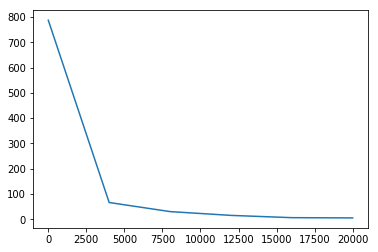

In [8]:
#Number of components
df['nc'].plot();

In [9]:
msg("Writing data to %s" %outFile)
write_graph_comp_sequence(gcs,outFile)

Writing data to ../Summary.csv


AttributeError: 'dict' object has no attribute 'iteritems'